In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.special import binom

# 1.2 Random Variables

## Knowledge

### Introduction

A **random variable** is a mapping $X : \Omega \to \mathbb{R}$ that assigns a real number $X(\omega)$ to each outcome.

As an example, if $\Omega = \left\{(x,y): x^2 + y^2 \leq 1\right\}$ (i.e. a unit disk) then the 'outcome' $\omega$ of picking a point from this disk takes the form $\omega = (x,y)$, so we could define some random variables $X$, $Y$, $Z$ and $W$ as follows:

1. $X(\omega) = x$
2. $Y(\omega) = y$
3. $Z(\omega) = x + y$
4. $W(\omega) = \sqrt{x^2 + y^2}$

The **inverse image** of a random is defined as $X^{-1}(A) := \{\omega \in \Omega : X(\omega) \in A\}$. Using this we have the following facts:

$$
\mathbb{P}(X \in A) := \mathbb{P}(X^{-1}(A)) = \mathbb{P}(\{\omega \in \Omega; X(\omega) \in A\})
$$

$$
\mathbb{P}(X = x) := \mathbb{P}(X^{-1}(x)) = \mathbb{P}(\{\omega \in \Omega; X(\omega) = x \})
$$

As an example, flipping a coin twice and let $X$ be the number of heads. Then, the probability of getting no heads is the same as the probability of getting two tails:

$$
\mathbb{P}(X = 0) = \mathbb{P}(\{TT\}) = \frac{1}{4}
$$

Alternatively the probability of getting 1 head is the same as the probability of getting H then T, or T then H:

$$
\mathbb{P}(X = 1) = \mathbb{P}(\{HT, TH\}) = \frac{1}{2}
$$

### Distribution Functions and Probabilty Functions

The **culmulative distribution function** (CDF) is the function $F_X:\mathbb{R} \to [0,1]$ defined by

$$
F_X(x) = \mathbb{P}(X \leq x)
$$

Sometimes $F_X$ is written simply as $F$. We write $X \sim F$ to denote "$X$ has distribution $F$".

In the example above with the fair coin flip, the CDF is defined as:

$$
F_X(x) = \begin{cases}
      0 & x < 0 \\
      1/4 & 0 \leq x < 1 \\
      3/4 & 1 \leq x < 2 \\
      1 & x \geq 2
    \end{cases}
$$

$X$ is **discrete** if it takes countably many values $\{x_1, x_2, \dots \}$. A set is **countable** if it is finite or has a 1-1 correspondence with the integers. 

For discrete random variables, we define the **probability function** or **probability mass function** for $X$ by $f_X(x) = \mathbb{P}(X = x)$. Thus $f_X(x) \geq 0 \; \forall \; x \in \mathbb{R}$ and $\sum_if(X)(x_i) = 1$. Sometimes $f_X$ is written simply as $f$. The CDF of $X$ is related to $f_X$ by:

$$
F_X(x) = \mathbb{P}(X \leq x) = \sum_{x_i \leq x}f_X(x_i)
$$

In the coin toss example above, the probability function is:

$$
f_X(x) = \begin{cases}
      1/4 & x = 0 \\
      1/2 & x = 1 \\
      1/4 & x = 2 \\
      0 & \text{otherwise}
    \end{cases}
$$

A random variable $X$ is **continuous** if there exists a function $f_X$ (known as the **probability density function** (PDF)) such that:

$$
\begin{array}\\
\text{1.} \qquad & f_X(x) \geq 0 \qquad \forall \; x\\
\text{2.} \qquad & \int_{-\infty}^\infty f_X(x)dx = 1\\
\text{3.} \qquad & \mathbb{P}(a < X< b) = \int_a^b f_X(x)dx \qquad \text{for every } a \leq b\\
\end{array}
$$

For all points $x$ at which $F_X$ is differentiable, we have $f_X(x) = F_X'(x)$ and

$$
F_X(x) = \int_{-\infty}^x f_X(t)dt \qquad \text{for every } a \leq b
$$

**Warning:** if $X$ is continuous then $\mathbb{P}(X=x) = 0$ for every $x$ - it's important to recognise that the PDF $f(x)$ is not the same as $\mathbb{P}(X=x)$ (although this does hold if $X$ is discrete), and indeed a PDF can be bigger than 1. Instead probabilities for continuous random variables are calculated through integration. 

Let $X$ be a random variable with CDF $F$. The **inverse CDF** or **quantile function** is defined by:

$$
F^{-1}(q) = \text{inf}\left\{x : F(x) > q\right\} \qquad q \in [0,1].
$$

`inf` is basically the same as the minimum. If $F$ is strictly increasing and continuous, then $F^{-1}(q)$ is the unique real number $x$ such that $F(x) = q$.

We call $F^{-1}(1/4)$ the **first quartile**, $F^{-1}(1/2)$ the **median** and $F^{-1}(3/4)$ the **third quartile**.

Two random variables $X$ and $Y$ are **equal in distribution** (denoted $X \stackrel{d}{=} Y$) if $F_X(x) = F_Y(x) \; \forall \; x$.

#### Theorem

Let $X$ have CDF $F$ and let $Y$ have CDF $G$. If $F(x) = G(x) \; \forall \; x$, then $\mathbb{P}(X \in A) = \mathbb{P}(Y \in A) \; \forall \; A$.

#### Theorem

A function $F: \mathbb{R} \to [0,1]$ is a CDF for some probability $\mathbb{P}$ iff $F$ satisfies the following three conditions:

1. $F$ is non-decreasing: $x_1 < x_2 \implies F(x_1) \leq F(x_2)$
2. $F$ is normalised: $\lim_{n /to -\infty}F(x) = 0$ and $\lim_{n /to \infty}F(x) = 1$
3. $F$ is right-continuous: $F(x)= F(x^+) \; \forall \; x$ where $F(x^+) = lim_{y \downarrow x} F(y)$

#### Lemma

Let $F$ by the CDF for a random variable $X$. Then:

1. $\mathbb{P}(X=x) = F(x) - F(x^{-1})$ where $F(x^{-1}) = \lim_{y \uparrow x}F(y)$
2. $\mathbb{P}(x < X \leq y) = F(y) - F(x)$
3. $\mathbb{P}(X > x) = 1 - F(x)$
4. If $X$ is continuous then:
$$
\begin{array}
 \\F(b) - F(a) & = \mathbb{P}(a < X < b) \\
 & = \mathbb{P}(a \leq X < b) \\
 & = \mathbb{P}(a < X \leq b) \\
 & = \mathbb{P}(a \leq X \leq b)
\end{array}
$$

### Some Important Discrete Random Variables

#### The Point Mass Distribution: $X \sim \delta_a$

$$
\mathbb{P}(X=a) = 1, \qquad F(x) = \left\{ \begin{array}\\0 & x<a \\ 1 & x\geq a\end{array}\right., \qquad f(x) = \left\{ \begin{array}\\1 & x=a \\ 0 & \text{otherwise}\end{array}\right.
$$

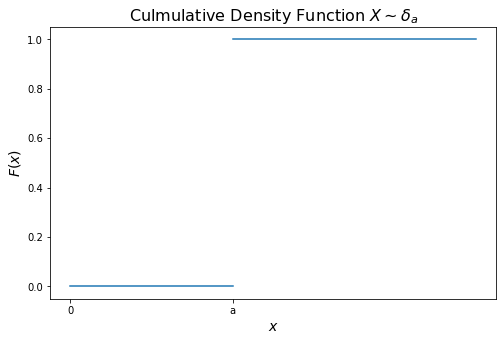

In [2]:
f, ax = plt.subplots(figsize=(8, 5))

ax.plot([0, 1], [0, 0], color="tab:blue")
ax.plot([1, 2.5], [1, 1], color="tab:blue")

ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "a"])
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$F(x)$", fontsize=14)
ax.set_title(r"Culmulative Density Function $X \sim \delta_a$", fontsize=16);

#### The Discrete Uniform Distribution: $X \sim \text{Unif}(\{1, \dots, k\})$

We say that for $k > 1$, $X$ has uniform distribution on $\{1, \dots , k\}$ if

$$
f(x) = \left\{ \begin{array}\\1/k & x=1, \dots , k \\ 0 & \text{otherwise}\end{array}\right.
$$

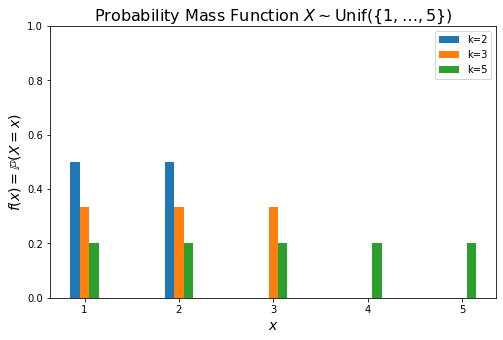

In [3]:
f, ax = plt.subplots(figsize=(8, 5))

# View multiple values of k
k_choice = [2, 3, 5]
for i, k in enumerate(k_choice):
    ax.bar(
        np.arange(1, 1 + k) + (0.1 * (i - 1)), 1 / k, width=0.1, label=f"{k=}"
    )

# Set labels
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel(r"$f(x) = \mathbb{P}(X = x)$", fontsize=14)
ax.set_title(
    r"Probability Mass Function $X \sim \mathrm{Unif}(\{1, \dots, 5\})$",
    fontsize=16,
);

#### The Bernoulli Distribution: $X \sim \text{Bernoulli}(p)$

For some $p \in [0, 1]$:

$$
\mathbb{P}(X = 1) = p, \;\mathbb{P}(X = 0) = 1 - p, \qquad f(x) = p^x(1-p)^{1-x}, x \in \{0, 1\}
$$

An example is a binary coin toss.

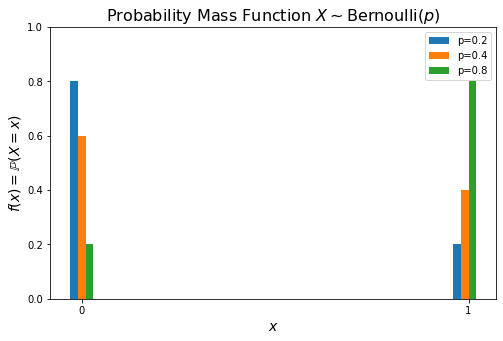

In [4]:
f, ax = plt.subplots(figsize=(8, 5))

# See impact of different probabilities
p_choice = [0.2, 0.4, 0.8]
for i, p in enumerate(p_choice):
    ax.bar(
        np.arange(0, 2) + (0.02 * (i - 1)),
        [1 - p, p],
        width=0.02,
        label=f"{p=}",
    )

# Set the labels
ax.set_xticks([0, 1.01])
ax.set_xticklabels(["0", "1"])
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel(r"$f(x) = \mathbb{P}(X = x)$", fontsize=14)
ax.set_title(
    r"Probability Mass Function $X \sim \mathrm{Bernoulli}(p)$", fontsize=16
);

#### The Binomial Distribution: $X \sim \text{Binomial}(n, p)$

For some $p \in [0, 1]$, $n \in \mathbb{N}$:

$$
f(x) = \mathbb{P}(X=x) = \left\{ \begin{array} \\ \left(\begin{array} \\ n\\ x\\ \end{array}\right)p^x(1-p)^{n-x} & \text{for } x = 0, \dots, n \\ 0 & \text{otherwise} \end{array}\right.
$$

If $X_1 \sim \text{Binomial}(n_1, p)$ and $X_2 \sim \text{Binomial}(n_2, p)$ then $X_1 + X_2 \sim \text{Binomial}(n_1 + n_2, p)$.

An example is where $X$ is the number of heads achieved in $n$ coin tosses, where $p$ is the probability of throwing a heads.

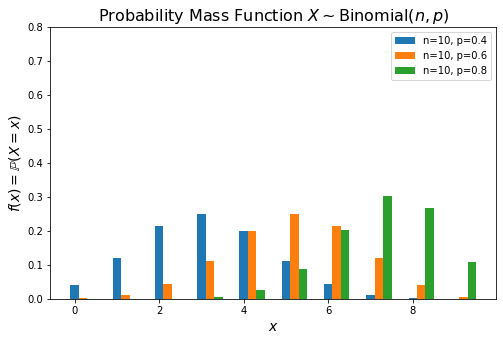

In [5]:
f, ax = plt.subplots(figsize=(8, 5))

# Look at different parameters
p_choice, n = [0.4, 0.6, 0.8], 10
for i, p in enumerate(p_choice):
    ax.bar(
        np.arange(1, 1 + n) + (0.2 * i - 1),
        [
            binom(n, x) * p**x * (1 - p) ** (n - x)
            for x in np.arange(1, 1 + n)
        ],
        width=0.2,
        label=f"{n=}, {p=}",
    )

# Set the labels
ax.legend()
ax.set_ylim(0, p)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel(r"$f(x) = \mathbb{P}(X = x)$", fontsize=14)
ax.set_title(
    r"Probability Mass Function $X \sim \mathrm{Binomial}(n, p)$", fontsize=16
);

#### The Geometric Distribution: $X \sim \text{Geom}(p)$

For some $p \in (0, 1)$:

$$
\mathbb{P}(X=k) = p(1-p)^{k-1}, \; k \geq 1
$$

As a special feature of this function:

$$
\sum_{k=1}^\infty \mathbb{P}(X = k) = p \sum_{k=1}^\infty (1-p)^k = \frac{p}{1-(1-p)} = 1
$$

An example is $X$ being the number of flips needed until the first head when flipping a coin i.e. the probability of flipping the coin $k$ times before getting the first head.

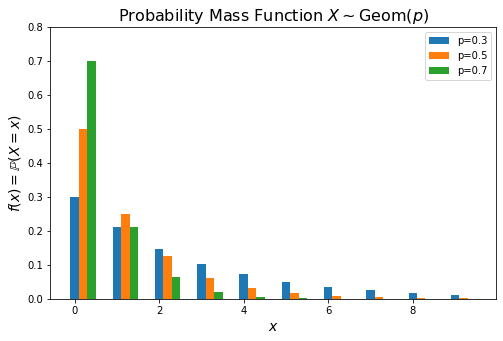

In [6]:
f, ax = plt.subplots(figsize=(8, 5))

# View multiple probabilities
p_choice = [0.3, 0.5, 0.7]
for i, p in enumerate(p_choice):
    ax.bar(
        np.arange(1, 11) + (0.2 * i - 1),
        [p * (1 - p) ** (k - 1) for k in np.arange(1, 11)],
        width=0.2,
        label=f"p={p}",
    )

# Set the labels
ax.legend()
ax.set_ylim(0, max(p_choice) + 0.1)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel(r"$f(x) = \mathbb{P}(X = x)$", fontsize=14)
ax.set_title(
    r"Probability Mass Function $X \sim \mathrm{Geom}(p)$", fontsize=16
);

#### The Poisson Distribution: $X \sim \text{Poisson}(\lambda)$

$$
f(x) = e^{-\lambda}\frac{\lambda ^ x}{x!} \qquad x \geq 0
$$

As a special feature of this function:

$$
\sum_{x=0}^\infty f(x) = e^{-\lambda} \sum_{x=0}^\infty \frac{\lambda^x}{x!} = e^{-\lambda}e^\lambda = 1
$$

If $X_1 \sim \text{Poisson}(\lambda_1, p)$ and $X_2 \sim \text{Poisson}(\lambda_2)$ then $X_1 + X_2 \sim \text{Poisson}(\lambda_1 + \lambda_2)$.

This is often used as a model for counts of rare events like radioactive decay and traffic accidents.

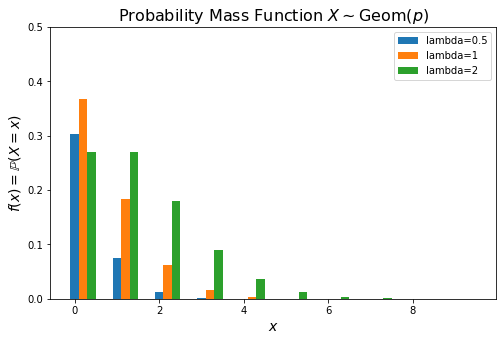

In [7]:
f, ax = plt.subplots(figsize=(8, 5))

# View multiple lambdas
l_choice = [0.5, 1, 2]
for i, l in enumerate(l_choice):
    ax.bar(
        np.arange(1, 11) + (0.2 * i - 1),
        [
            math.exp(-l) * (l**x) / math.factorial(x)
            for x in np.arange(1, 11)
        ],
        width=0.2,
        label=f"lambda={l}",
    )

# Set the labels
ax.legend()
ax.set_ylim(0, 0.5)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel(r"$f(x) = \mathbb{P}(X = x)$", fontsize=14)
ax.set_title(
    r"Probability Mass Function $X \sim \mathrm{Geom}(p)$", fontsize=16
);

### Some Important Continuous Random Variables

#### Uniform Distribution: $X \sim \text{Uniform}(a, b)$

$$
f(x) = \left\{ \begin{array}\\ \frac{1}{b-a} & \text{for} x \in [a, b] \\ 0 & \text{otherwise} \end{array} \right.
$$

$$
F(x) = \left\{ \begin{array}\\ 0 & x < a \\ \frac{x-a}{b-a} & x \in [a, b] \\ 1 & x >b \end{array} \right.
$$

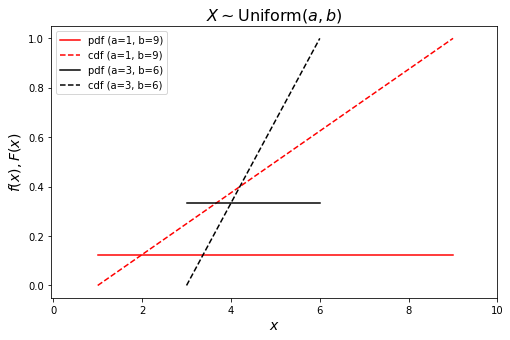

In [8]:
f, ax = plt.subplots(figsize=(8, 5))
size = 1000

# Set the parameters
a, b = 1, 9

# Generating uniform distribution
uniform_distribution = stats.uniform(loc=a, scale=b - a)
x = np.linspace(uniform_distribution.ppf(0), uniform_distribution.ppf(1), size)

# Plotting pdf
pdf = uniform_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({a=}, {b=})")

# Plotting cdf
cdf = uniform_distribution.cdf(x)
ax.plot(x, cdf, color="red", label=f"cdf ({a=}, {b=})", linestyle="dashed")

# Set some new parameters
a, b = 3, 6

# Generating uniform distribution
uniform_distribution = stats.uniform(loc=a, scale=b - a)
x = np.linspace(uniform_distribution.ppf(0), uniform_distribution.ppf(1), size)

# Plotting pdf
pdf = uniform_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({a=}, {b=})")

# Plotting cdf
cdf = uniform_distribution.cdf(x)
ax.plot(x, cdf, color="black", label=f"cdf ({a=}, {b=})", linestyle="dashed")

# Set labels
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(-0.05, 10)
ax.legend()
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \mathrm{Uniform}(a, b)$", fontsize=16);

#### Normal (Gaussian): $X \sim N(\mu, \sigma^2)$

For $\mu \in \mathbb{R}$ (center or mean) and $\sigma > 0$ (spread or standard deviation):

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\},\qquad x \in \mathbb{R}
$$

The normal distribution is used to measure many different events within nature.

$X$ has a **standard Normal distribution** (usually denoted $Z$) if $\mu = 0$ and $\sigma = 1$. The pdf and cdf of a standard Normal are denoted by $\phi(z)$ and $\Phi(z)$.

1. If $X \sim N(\mu, \sigma^2)$ then $Z = (X - \mu)/\sigma \sim N(0,1)$.
2. If $Z \sim N(0,1)$ then $X = \mu + \sigma Z \sim N(\mu, \sigma^2)$.
3. If $X_i \sim N(\mu, \sigma^2), i = 1, \dots, n$ are independent. then

$$
\sum_{i=1}^nX_i \sim N\left(\sum_{i=1}^n\mu_i, \sum_{i=1}^n\sigma_i^2\right)
$$

4. If $X \sim N(\mu, \sigma^2)$ then

$$
\begin{array}\\
\mathbb{P}(a < X < b) &= \mathbb{P}\left(\frac{a-\mu}{\sigma} < Z < \frac{b - \mu}{\sigma}\right)\\
&= \Phi\left(\frac{b-\mu}{\sigma}\right) - \Phi\left(\frac{a-\mu}{\sigma}\right)
\end{array}
$$

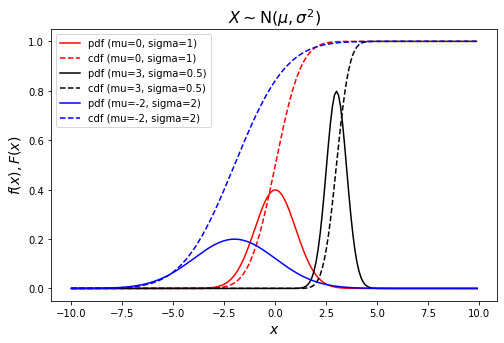

In [9]:
f, ax = plt.subplots(figsize=(8, 5))
x = np.arange(-10, 10, 0.1)

# Set the parameters
mu, sigma = 0, 1

# Generating distribution
normal_distribution = stats.norm(loc=mu, scale=sigma)

# Plotting pdf
pdf = normal_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({mu=}, {sigma=})")

# Plotting cdf
cdf = normal_distribution.cdf(x)
ax.plot(
    x, cdf, color="red", label=f"cdf ({mu=}, {sigma=})", linestyle="dashed"
)

# Set some new parameters
mu, sigma = 3, 0.5

# Generating distribution
normal_distribution = stats.norm(loc=mu, scale=sigma)

# Plotting pdf
pdf = normal_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({mu=}, {sigma=})")

# Plotting cdf
cdf = normal_distribution.cdf(x)
ax.plot(
    x, cdf, color="black", label=f"cdf ({mu=}, {sigma=})", linestyle="dashed"
)

# Set some new parameters
mu, sigma = -2, 2

# Generating distribution
normal_distribution = stats.norm(loc=mu, scale=sigma)

# Plotting pdf
pdf = normal_distribution.pdf(x)
ax.plot(x, pdf, color="blue", label=f"pdf ({mu=}, {sigma=})")

# Plotting cdf
cdf = normal_distribution.cdf(x)
ax.plot(
    x, cdf, color="blue", label=f"cdf ({mu=}, {sigma=})", linestyle="dashed"
)

# Set labels
ax.legend()
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \mathrm{N}(\mu, \sigma^2)$", fontsize=16);

#### Exponential Distribution: $X \sim \text{Exp}(\beta)$

For $\beta > 0$: 

$$
\begin{array}\\
&f(x) &= \left\{\begin{array}\\\frac{1}{\beta}e^{-x/\beta} \qquad & x \geq 0 \\
0 & x < 0\end{array}\right.\\
F(x) = &\mathbb{P}(X \leq x) &= \left\{\begin{array}\\1 - e^{-\frac{x}{\beta}} & x \geq 0 \\
0 & x < 0\end{array}\right.\\
\end{array}
$$

This is often used to model the lifetimes of electronic components and the waiting time between rare events.

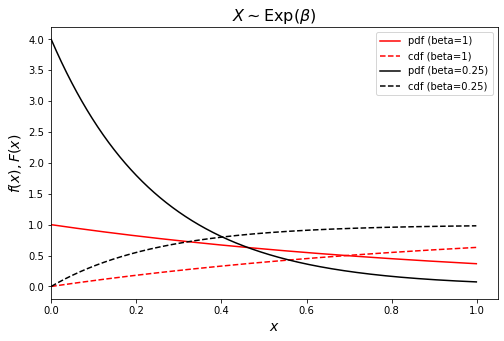

In [10]:
f, ax = plt.subplots(figsize=(8, 5))
x = np.arange(0, 1, 0.001)

# Set the parameters
beta = 1

# Generating distribution
expon_distribution = stats.expon(scale=beta)

# Plotting pdf
pdf = expon_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({beta=})")

# Plotting cdf
cdf = expon_distribution.cdf(x)
ax.plot(x, cdf, color="red", label=f"cdf ({beta=})", linestyle="dashed")

# Set some new parameters
beta = 0.25

# Generating distribution
expon_distribution = stats.expon(scale=beta)

# Plotting pdf
pdf = expon_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({beta=})")

# Plotting cdf
cdf = expon_distribution.cdf(x)
ax.plot(x, cdf, color="black", label=f"cdf ({beta=})", linestyle="dashed")

# Set labels
ax.legend()
ax.set_xlim(0)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \mathrm{Exp}(\beta)$", fontsize=16);

#### Gamma Distribution: $X \sim \text{Gamma}(\alpha, \beta)$

For $\alpha, \beta > 0$:

$$
f(x) = \frac{1}{\beta^\alpha \Gamma(\alpha)} x^{\alpha - 1}e^{-x/\beta}, \qquad x \geq 0
$$

Where the Gamma Function $\Gamma$ is defined as:

$$
\Gamma(\alpha) = \int_0^\infty y^{\alpha - 1}e^{-y}dy
$$

If $X_i \sim \text{Gamma}(\alpha_i, \beta)$ are independent then $\sum_{i=1}^nX_i \sim \text{Gamma}\left(\sum_{i=1}^n\alpha_i, \beta\right)$

$\text{Exp}(\beta)$ is just a $\text{Gamma}(1, \beta)$ distribution. The Exponential distribution is usually about the waiting time until the 1st event, whilst Gamma is the waiting time until the $\alpha$th event.

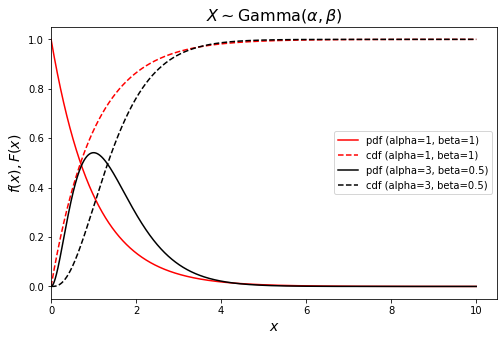

In [11]:
f, ax = plt.subplots(figsize=(8, 5))
x = np.arange(0, 10, 0.001)

# Set the parameters
alpha, beta = 1, 1

# Generating distribution
gamma_distribution = stats.gamma(a=alpha, scale=beta)

# Plotting pdf
pdf = gamma_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({alpha=}, {beta=})")

# Plotting cdf
cdf = gamma_distribution.cdf(x)
ax.plot(
    x, cdf, color="red", label=f"cdf ({alpha=}, {beta=})", linestyle="dashed"
)

# Set some new parameters
alpha, beta = 3, 0.5

# Generating distribution
gamma_distribution = stats.gamma(a=alpha, scale=beta)

# Plotting pdf
pdf = gamma_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({alpha=}, {beta=})")

# Plotting cdf
cdf = gamma_distribution.cdf(x)
ax.plot(
    x, cdf, color="black", label=f"cdf ({alpha=}, {beta=})", linestyle="dashed"
)

# Set labels
ax.legend()
ax.set_xlim(0)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \mathrm{Gamma}(\alpha, \beta)$", fontsize=16);

#### Beta Distribution: $X \sim \text{Beta}(\alpha, \beta)$

For $\alpha, \beta > 0$:

$$
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1-x)^{\beta - 1}, \qquad 0 < x < 1
$$

$\text{Beta}(1, 1)$ is a uniform distribution.

Beta distribution can be thought of as representing the probability of getting a heads on a coin flip, having observed $\alpha - 1$ heads, and $\beta - 1$ tails.

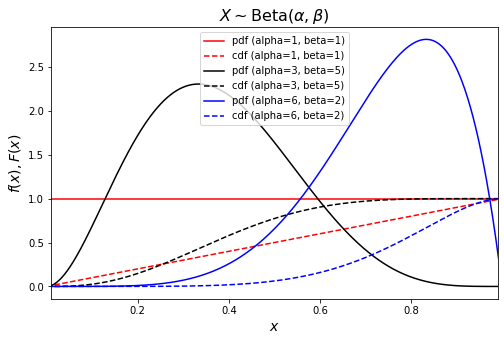

In [12]:
f, ax = plt.subplots(figsize=(8, 5))
x = np.arange(0, 1, 0.001)

# Set the parameters
alpha, beta = 1, 1

# Generating distribution
beta_distribution = stats.beta(a=alpha, b=beta)

# Plotting pdf
pdf = beta_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({alpha=}, {beta=})")

# Plotting cdf
cdf = beta_distribution.cdf(x)
ax.plot(
    x, cdf, color="red", label=f"cdf ({alpha=}, {beta=})", linestyle="dashed"
)

# Set some new parameters
alpha, beta = 3, 5

# Generating distribution
beta_distribution = stats.beta(a=alpha, b=beta)

# Plotting pdf
pdf = beta_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({alpha=}, {beta=})")

# Plotting cdf
cdf = beta_distribution.cdf(x)
ax.plot(
    x, cdf, color="black", label=f"cdf ({alpha=}, {beta=})", linestyle="dashed"
)

# Set some new parameters
alpha, beta = 6, 2

# Generating distribution
beta_distribution = stats.beta(a=alpha, b=beta)

# Plotting pdf
pdf = beta_distribution.pdf(x)
ax.plot(x, pdf, color="blue", label=f"pdf ({alpha=}, {beta=})")

# Plotting cdf
cdf = beta_distribution.cdf(x)
ax.plot(
    x, cdf, color="blue", label=f"cdf ({alpha=}, {beta=})", linestyle="dashed"
)

# Set labels
ax.legend()
ax.set_xlim(0.01, 0.99)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \mathrm{Beta}(\alpha, \beta)$", fontsize=16);

#### t and Cauchy distribution: $X \sim t_v$

$X$ has a $t$ distribution with $v$ degrees of freedom if:

$$
f(x) = \frac{\Gamma\left(\frac{v+1}{2}\right)}{\Gamma\left(\frac{v}{2}\right)} \frac{1}{\left(1 + \frac{x^2}{v}\right)^{(v+1)/2}}
$$

Normal distribution corresponds to a t distribution where $v=\infty$.

The **Cauchy** distribution is a special case where $v=1$, and in this case:

$$
f(x) = \frac{1}{\pi(1 + x^2)}
$$

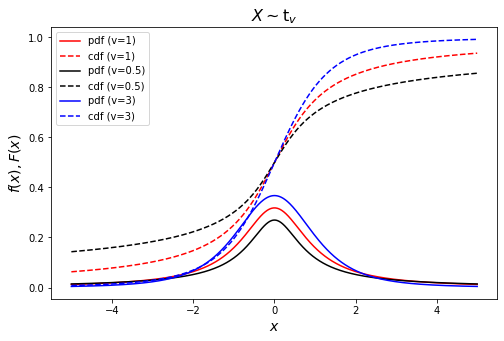

In [13]:
f, ax = plt.subplots(figsize=(8, 5))
x = np.arange(-5, 5, 0.01)

# Set the parameters
v = 1

# Generating distribution
t_distribution = stats.t(df=v)

# Plotting pdf
pdf = t_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({v=})")

# Plotting cdf
cdf = t_distribution.cdf(x)
ax.plot(x, cdf, color="red", label=f"cdf ({v=})", linestyle="dashed")

# Set some new parameters
v = 0.5

# Generating distribution
t_distribution = stats.t(df=v)

# Plotting pdf
pdf = t_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({v=})")

# Plotting cdf
cdf = t_distribution.cdf(x)
ax.plot(x, cdf, color="black", label=f"cdf ({v=})", linestyle="dashed")

# Set some new parameters
v = 3

# Generating distribution
t_distribution = stats.t(df=v)

# Plotting pdf
pdf = t_distribution.pdf(x)
ax.plot(x, pdf, color="blue", label=f"pdf ({v=})")

# Plotting cdf
cdf = t_distribution.cdf(x)
ax.plot(x, cdf, color="blue", label=f"cdf ({v=})", linestyle="dashed")

# Set labels
ax.legend()
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \mathrm{t}_v$", fontsize=16);

#### $\chi^2$ Distribution: $X \sim \chi^2_p$

$X$ has a $\chi^2$ distribution with $p$ degrees of freedom if:

$$
f(x) = \frac{1}{\Gamma\left(\frac{p}{2}\right)2^\frac{p}{2}}x^{\frac{p}{2}-1}e^{-\frac{x}{2}}, \qquad x>0
$$

If $Z_1, \dots, Z_p$ are independent standard Normal random variables then:

$$
\sum_{i=1}^pZ_i^2 \sim\chi_p^2
$$


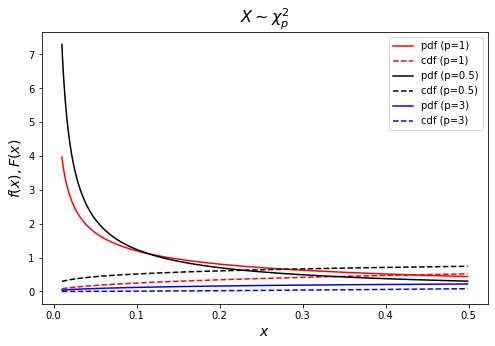

In [14]:
f, ax = plt.subplots(figsize=(8, 5))
x = np.arange(0.01, 0.5, 0.001)

# Set the parameters
p = 1

# Generating distribution
chi_distribution = stats.chi2(df=p)

# Plotting pdf
pdf = chi_distribution.pdf(x)
ax.plot(x, pdf, color="red", label=f"pdf ({p=})")

# Plotting cdf
cdf = chi_distribution.cdf(x)
ax.plot(x, cdf, color="red", label=f"cdf ({p=})", linestyle="dashed")

# Set some new parameters
p = 0.5

# Generating distribution
chi_distribution = stats.chi2(df=p)

# Plotting pdf
pdf = chi_distribution.pdf(x)
ax.plot(x, pdf, color="black", label=f"pdf ({p=})")

# Plotting cdf
cdf = chi_distribution.cdf(x)
ax.plot(x, cdf, color="black", label=f"cdf ({p=})", linestyle="dashed")

# Set some new parameters
p = 3

# Generating distribution
chi_distribution = stats.chi2(df=p)

# Plotting pdf
pdf = chi_distribution.pdf(x)
ax.plot(x, pdf, color="blue", label=f"pdf ({p=})")

# Plotting cdf
cdf = chi_distribution.cdf(x)
ax.plot(x, cdf, color="blue", label=f"cdf ({p=})", linestyle="dashed")

# Set labels
ax.legend()
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$f(x), F(x)$", fontsize=14)
ax.set_title(r"$X \sim \chi^2_p$", fontsize=16);

### Bivariate Distributions

Given a pair of discrete random variables $X$ and $Y$, the **joint mass function** $f_{X, Y}$ is:

$$
f_{X, Y}(x, y) := \mathbb{P}(X = x \text{ and } Y = y) = \mathbb{P}(X = x, Y=y)
$$

In the continuous case, we call a function $f(x, y)$ a PDF for the random variables $(X, Y)$ if:

1. $f(x, y) \geq 0$ for all $(x,y)$.
2. $\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x, y)dxdy = 1$
3. for any set $A \subset \mathbb{R} \times \mathbb{R}$, $\mathbb{P}((X,Y)\in A) = \int\int_Af(x,y)dxdy$

In the discrete or continuous case, we define the join CDF as $F_{X,Y}(x,y) = \mathbb{P}(X \leq x, Y \leq y)$.

### Marginal Distributions

If $(X,Y)$ is discrete and have joint distribution with mass function $f_{X,Y}$, then the **marginal mass function for $X$** is defined by

$$
f_X(x) = \mathbb{P}(X=x) = \sum_y\mathbb{P}(X=x, Y=y) = \sum_yf(x,y)
$$

and the **marginal mass function for $Y$** is defined by

$$
f_Y(y) = \mathbb{P}(Y=y) = \sum_x\mathbb{P}(X=x, Y=y) = \sum_xf(x,y)
$$

For continuous random variables, the **marginal densities** are

$$
f_X(x) = \int f(x,y)dy \qquad \text{and} \qquad f_Y(y) = \int f(x,y)dx
$$

The corresponding **marginal distribution functions** are denoted by $F_X$ and $F_Y$.

### Independent Random Variables

Two random variables $X$ and $Y$ are **independent** if, for every $A$ and $B$

$$
\mathbb{P}(X \in A, Y \in B) = \mathbb{P}(X \in A)\mathbb{P}(Y \in B)
$$

and we write $X \perp \!\!\! \perp Y$. Otherwise we say that $X$ and $Y$ are dependent and we write $X \not\!\perp\!\!\!\perp Y$.

We have:

$$
X \perp \!\!\! \perp Y \iff f_{X, Y}(x,y) = f_X(x)f_Y(y) \qquad \forall \; x, y
$$

We also have that if the range of $X$ and $Y$ is a (possibly infinite) rectangle, then if $f(x,y) = g(x)h(y)$ for some functions $g$ and $h$, then $X$ and $Y$ are independent.

### Conditional Distributions

For *discrete* random variables $X$ and $Y$, if $f_Y(y) > 0$, the **conditional probability mass function** is

$$
f_{X|Y}(x|y) = \mathbb{P}(X = x| Y=y) = \frac{\mathbb{P}(X = x, Y = y)}{\mathbb{P}(Y=y)} = \frac{f_{X,Y}(x,y)}{f_Y(y)}
$$

For *continuous* random variables $X$ and $Y$, the **conditional probability density function** is

$$
f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
$$

assuming that $f_Y(y) > 0$, and we have that

$$
\mathbb{P}(X \in A | Y=y) = \int_Af_{X|Y}(x|y)dx
$$

This definition gives us some useful equivalences:

$$
f_{X,Y}(x,y) = f_{X|Y}(x|y)f_Y(y) = f_{Y|X}(y|x)f_X(x)
$$


### Multivariate Distributions and 11D Samples

Let $X = (X_1, \dots, X_n)$ where $X_1, \dots, X_n$ are random variables. We call $X$ a **random vector**. Let $f(x_1, \dots, x_n)$ denote the PDF. We say that $X_1, \dots, X_n$ are **independent** if, for every $A_1, \dots A_n$,

$$
\mathbb{P}(X_1 \in A_1, \dots, X_n \in A_n) = \prod_{i=1}^n\mathbb{P}(X_i \in A_i)
$$

If suffices to check that $f(x_1, \dots, x_n) = \prod_{i=1}^nf_{X_i}(x_i)$.

If $X_1, \dots, X_n$ are independent and each has the same marginal distribution with CDF $F$, we say that $X_1, \dots, X_n$ are **IID (Independent and Identically Distributed)**, and we write

$$
X_1, \dots, X_n \sim F
$$

If $F$ has density $f$, we also write $X_1, \dots, X_n \sim f$. We also call $X_1, \dots, X_n$ a **random sample of size $n$ from $F$**.

### Two Important Multivariate Distributions

#### Multinomial: $X \sim \text{Multinomial}(n, p)$

Let $p = (p_1, \dots, p_k)$ where $p_j\geq 0$ and $\sum_{j=1}^kp_j=1$ and $X = (X_1, \dots, X_k)$, then $X \sim \text{Multinomial}(n, p)$.

$$
f(x) = \binom{n}{x_1\dots x_k} p_1^{x_1}\dots p_k^{x_k}
$$

It can also be shown that:

$$
F_{X_j} \sim \text{Binomial}(n, p_j)
$$

An example here is drawing $n$ balls from an urn (with replacement) containing $k$ different colours of ball, where $X_j$ is the number of times color $j$ appears, and and $p_j$ is the probability of picking a ball of color $j$. Then we have $X = (X_1, \dots, X_k)$ and $p = (p_1, \dots, p_k)$.

#### Multivariate Normal: $X \sim N(\mu, \Sigma)$

Let $X = (X_1, \dots, X_k)$, $\mu$ be a vector of length $k$ and $\Sigma$ a $k \times k$ symmetric, positive definite matrix, then $X \sim N(\mu, \Sigma)$, if it has density:

$$
f(x) = \frac{1}{(2\pi)^{\frac{k}{2}}|\Sigma|^{\frac{1}{2}}}\exp\left\{ -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \right\}
$$

Setting $Z = (Z_1, \dots, Z_k)$ where $Z_1, \dots, Z_k N(0, 1)$ are independent, let $\mu$ be a vector of $k$ zeroes (represented as $0$) and $\Sigma = I$ (the identity matrix) gives us a special case known as the **standard multivariate Normal** distribution (denoted $Z \sim N(0, I)$) and we see that

$$
\begin{array}\\
f(z) &= \prod_{i=1}^kf(z_i) \\
&= \frac{1}{(2\pi)^{\frac{k}{2}}}\exp\left\{ -\frac{1}{2}\sum_{j=1}^kz_j^2\right\} \\
&= \frac{1}{(2\pi)^{\frac{k}{2}}}\exp\left\{ -\frac{1}{2}z^Tz\right\}
\end{array}
$$

If $Z \sim N(0, I)$ and $X = \mu + \Sigma^\frac{1}{2}Z$, then $X \sim N(\mu, \Sigma)$. Conversely, if $X \sim N(\mu, \Sigma)$ then $\Sigma^{-\frac{1}{2}}(X - \mu) \sim N(0, I)$.

If $X \sim N(\mu, \Sigma)$, we could partition $X = (X_a, X_b)$, $\mu = (\mu_a, \mu_b)$ and 

$$
\Sigma = \left(\begin{matrix}\Sigma_{aa} & \Sigma_{ab}\\\Sigma_{ba} & \Sigma_{bb} \end{matrix}\right)
$$

Which gives us the following results:

1. $X_a \sim N(\mu_a, \Sigma_{aa})$ 
2. $X_b|(X_a = x_a) \sim N(\mu_b \Sigma_{ba}\Sigma_{aa}^{-1}(x_a - \mu_a), \Sigma_{bb}-\Sigma_{ba}\Sigma_{aa}^{-1}\Sigma_{ab})$
3. If $a$ is a vector, then $a^TX \sim N(a^T\mu, a^T\Sigma a)$
4. $V = (X - \mu)^T\Sigma^{-1}(X - \mu) \sim \chi_k^2$

### Transformations of Random Variables

Suppose that $X$ is a random variable with PDF $f_X$ and CDF $F_X$. Let $Y = r(X)$ be a function of $X$, then we call $Y = r(X)$ a **transformation** of $X$.

For *discrete* random variables, we have:

$$
\begin{array}\\
f_Y(y) &= \mathbb{P}(Y = y) = \mathbb{P}(r(X) = y) \\
&= \mathbb{P}(\{x; r(x) = y\}) = \mathbb{P}(X \in r^{-1}(y))
\end{array}
$$

For *continuous* random variables finding $f_Y$ is harder and involves:

1. For each $y$ find the set $A_y = {x: r(x) \leq y}$.
2. Find the CDF

$$
\begin{array}\\
F_Y(y) &= \mathbb{P}(Y \leq y) = \mathbb{P}(r(X) \leq y) \\
&= \mathbb{P}(\{x; r(x) \leq y\}) \\
&= \int_{A_y}f_X(x)dx
\end{array}
$$
3. The PDF is $f_Y(y) = F_Y'(y)$

When $r$ is *strictly monotone increasing* or *strictly monotone decreasing*, then $r$ has an inverse $s = r^{-1}$ and in this case:

$$
f_Y(y) = f_X(s(y))\left|\frac{ds(y)}{dy}\right|
$$

### Transformations of Several Random Variables

We can also carry out **transformations** on multiple random variables. Let $Z = r(X, Y)$, then to find $f_Y$ we do the following:

1. For each $z$ find the set $A_z = {(x,y): r(x,y) \leq z}$.
2. Find the CDF

$$
\begin{array}\\
F_Z(z) &= \mathbb{P}(Z \leq z) = \mathbb{P}(r(X, Y) \leq z) \\
&= \mathbb{P}(\{(x,y); r(x,y) \leq z\}) \\
&= \int\int_{A_z}f_{X,Y}(x,y)dxdy
\end{array}
$$
3. The PDF is $f_Z(z) = F_Z'(z)$

## Computer Experiments

### Exercise 1

Let $X \sim N(0, 1)$ and let $Y = e^X$.

1) Find the PDF for $Y$. Plot it.

> We have that $A_y = \{x : e^x \leq y\} = \{x : x \leq \log y\}$.
> 
> $$
F_Y(y) = \mathbb{P}(Y \leq y) = \mathbb{P}(e^x \leq y) = \mathbb{P}(x \leq \log y) = F_X(\log y)
$$
> 
> Since $X \sim N(0, 1)$ we know that:
> 
> $$
f_X(x) = \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{1}{2}x^2\right\}
$$
> 
> Using the chain rule, we have:
> 
> $$
\begin{array}\\
f_Y(y) &= F_Y'(y) = (F_X(\log y))' = F_X'(\log y) \cdot (\log y)' \\
&= \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{1}{2}(\log y)^2\right\} \cdot \frac{1}{y} \\
&= \frac{1}{y \sqrt{2\pi}}\exp\left\{-\frac{1}{2}(\log y)^2\right\} \\
&= \frac{\exp\left\{-\frac{1}{2}(\log y)^2\right\}}{y \sqrt{2\pi}}\\
\end{array}
$$

In [15]:
def f_Y(y):
    """Function to return f_Y(y) given any value or vector"""
    return np.exp(-0.5 * np.log(y) ** 2) / (y * np.sqrt(2 * np.pi))

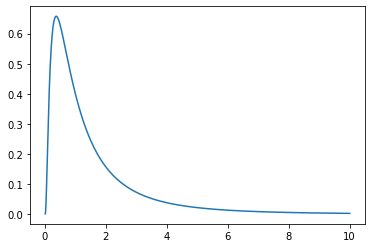

In [16]:
# Plot the graph
y = np.linspace(0.01, 10, 1000)
plt.plot(y, f_Y(y));

2) Generate a vector $x = (x_1, \dots, x_{10000})$ consisting of 10,000 random standard Normals. Let $y = (y_1, \dots, y_{10000})$ where $y_i = e^{x_i}$. Draw a histogram of $y$ and compare it to the PDF you found in part 1.

In [17]:
# Generate x
x = np.random.standard_normal(size=10000)

In [18]:
# Generate y
y_gen = np.exp(x)

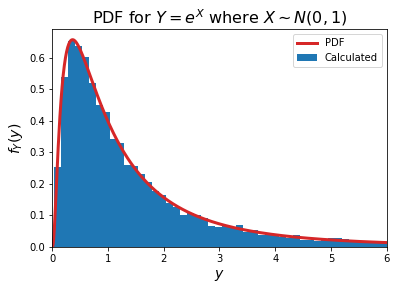

In [19]:
plt.hist(y_gen, bins=250, density=True, label="Calculated", color="tab:blue")
plt.plot(y, f_Y(y), label="PDF", color="tab:red", lw=3)
plt.legend()
plt.xlim(0, 6)
plt.xlabel("$y$", fontsize=14)
plt.ylabel("$f_Y(y)$", fontsize=14)
plt.title(r"PDF for $Y = e^X$ where $X \sim N(0,1)$", fontsize=16);

### Exercise 2 - Universal Random Number Generator

1. Let $X$ have a continuous, strictly increasing CDF $F$. Let $Y = F(X)$. Find the density of $Y$. This is called the **probability integral transform**. 

>$$
A_y = {x : F(x) \leq y}
$$
> 
>$$
F_Y(y) = \mathbb{P}(Y \leq y) = \mathbb{P}(F(X) \leq y) = \mathbb{P}(X \leq F^{-1}(y)) = F(F^{-1}(y)) = y
$$
> 
> Therefore:
>$$
f_Y(y) = F_Y'(y) = 1
$$
> 
> Thus $Y \sim \text{Uniform}(0, 1)$

2. Now let $U \sim \text{Uniform}(0, 1)$ and let $X = F^{-1}(U)$. Show that $X \sim F$. 

> Since $U \sim \text{Uniform}(0,1)$, $F_U(u) = u$. So,
> 
>$$
\mathbb{P}(X \leq x) = \mathbb{P}(F^{-1}(U) \leq x) = \mathbb{P}(U \leq F(x)) = F_U(F(x)) = F(x)
$$


3. Now write a program that takes Uniform(0, 1) random variables, and generate random variables from an Exponential($\beta$) distribution.

> Looking at the CDF for a Exponential($\beta$) distribution, we see that F is continuous, strictly increasing, so the above results hold. Specifically:
> 
>$$
F(x) = \mathbb{P}(X \leq x) = \left\{\begin{array}\\1 - e^{-\frac{x}{\beta}} & x \geq 0 \\
0 & x < 0\end{array}\right.
$$
>$$
F^{-1}(y) = \left\{\begin{array}\\-\beta\log(1 - y) & x \geq 0 \\
0 & x < 0\end{array}\right.
$$
>
> So if we are given $U \sim \text{Uniform}(0,1)$, and we let $X = F^{-1}(U)$ where $F^{-1}$ is defined as above, we can generate random variables from an Exponential($\beta$) distribution given Uniform(0, 1) random variables.

In [20]:
def F_inverse(x, beta=1):
    """Generate exponential(beta) RVs from uniform"""
    return -beta * np.log(1 - x)

In [21]:
def generate_random_variables(beta=1):
    """Create a graph to compare the generated to actual PDF"""

    u = np.random.uniform(size=1000)
    y = F_inverse(u, beta)
    # Plot the graph
    plt.hist(y, bins=100, density=True, label="Generated")

    # Generating distribution
    x = np.linspace(0, 10, 1000)
    expon_distribution = stats.expon(scale=beta)

    # Plotting pdf
    pdf = expon_distribution.pdf(x)
    plt.plot(x, pdf, color="red", lw=3, label=f"pdf ({beta=})")

    # Styling
    plt.xlim(0, 10)
    plt.legend()
    plt.title("Generating Exponential Random Variables")

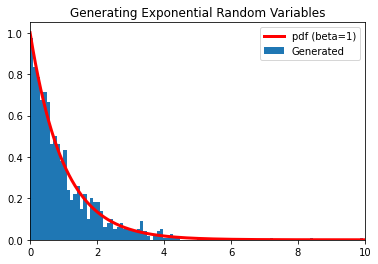

In [22]:
# Create the graph
generate_random_variables(1)

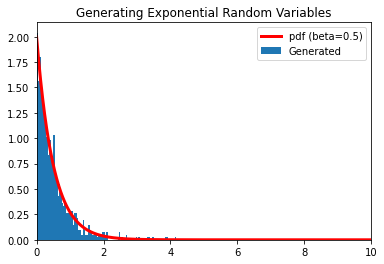

In [23]:
# Create the graph
generate_random_variables(0.5)

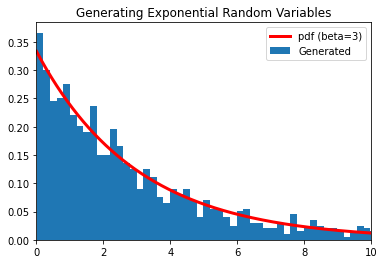

In [24]:
# Create the graph
generate_random_variables(3)